## ARIMA 모델을 이용한 유튜버 짤막한강좌 성장률 예측

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## 유튜버 정보 csv에서 읽어오기

In [2]:
df = pd.read_csv('data/짤막한강좌_stat.csv',index_col = 'searchDate')

In [3]:
df

,dailyViewCount,subscriberCount,videoCount,favorablePercent,activePercent
searchDate,,,,,
2020-02-14,17051,57100,267,98,50
2020-02-15,14185,57200,267,98,48
2020-02-16,13456,57300,267,98,47
2020-02-17,16687,57500,267,98,50
2020-02-18,16660,57700,267,98,50
...,...,...,...,...,...
2021-02-12,9568,92100,316,99,0
2021-02-13,8915,92100,316,99,0
2021-02-14,9773,92200,316,99,0


## 컬럼 정리 (구독자 수만 남겨놓기)

In [4]:
del df['dailyViewCount']
del df['videoCount']
del df['favorablePercent']
del df['activePercent']

In [5]:
df

,subscriberCount
searchDate,
2020-02-14,57100
2020-02-15,57200
2020-02-16,57300
2020-02-17,57500
2020-02-18,57700
...,...
2021-02-12,92100
2021-02-13,92100
2021-02-14,92200


## 30일 예측하기 위해서 마지막 한달 데이터 test로 분리

In [6]:
df_size = len(df)
pred_date = 30 # 30일 예측
target_date = df_size - pred_date

In [7]:
train_df = df[:target_date]

In [8]:
test_df = df[target_date:]

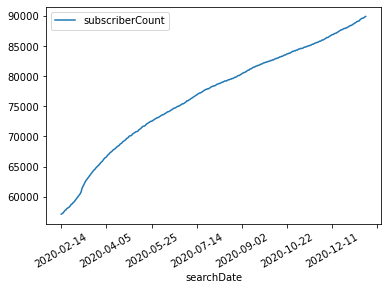

In [9]:
train_df.plot()
plt.xticks(rotation=30)
plt.show()

## ARIMA 모델 설계 및 학습

In [10]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [11]:
# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(train_df.subscriberCount.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

C:\Users\vdi02\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  337
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1821.710
Method:                       css-mle   S.D. of innovations             53.776
Date:                Tue, 16 Feb 2021   AIC                           3655.421
Time:                        15:56:02   BIC                           3678.341
Sample:                             1   HQIC                          3664.556
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.0959     20.270      4.938      0.000      60.367     139.825
ar.L1.D.y      1.2485      0.237      5.258      0.000       0.783       1.714
ar.L2.D.y     -0.2687      0.236     -1.139      0.2

C:\Users\vdi02\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


## 최종 30일 예측값 시각화

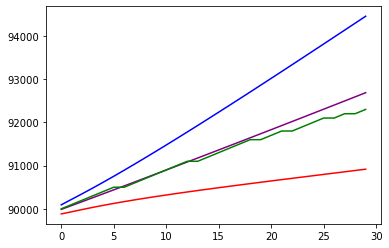

In [12]:
# 학습 데이터셋으로부터 30일 뒤를 예측합니다.
forecast_data = model_fit.forecast(steps=30) 

pred_y = forecast_data[0].tolist() # 마지막 30일의 예측 데이터입니다. 
test_y = test_df.subscriberCount.values # 실제 30일 가격 데이터입니다. 
pred_y_lower = [] # 마지막 30일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 30일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

#plt.ylim([78000,88000])
plt.plot(pred_y, color="purple") # 모델이 예상한 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [13]:
from sklearn import metrics

print(metrics.mean_absolute_error(test_y, pred_y))

109.97541469647112


In [14]:
forecast_data[0]

array([89987.31988716, 90076.63683947, 90166.70879389, 90257.18665946,
       90347.96839848, 90439.02043455, 90530.32826999, 90621.8828281 ,
       90713.67667287, 90805.70295979, 90897.95514198, 90990.42688509,
       91083.11204019, 91176.00463272, 91269.09885597, 91362.38906593,
       91455.86977662, 91549.53565565, 91643.38151989, 91737.40233129,
       91831.59319282, 91925.94934453, 92020.4661597 , 92115.13914114,
       92209.96391751, 92304.93623987, 92400.05197817, 92495.307118  ,
       92590.69775731, 92686.22010327])

## 발표날까지 예측

In [15]:
# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(df.subscriberCount.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

C:\Users\vdi02\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  367
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1977.079
Method:                       css-mle   S.D. of innovations             52.795
Date:                Tue, 16 Feb 2021   AIC                           3966.158
Time:                        15:56:03   BIC                           3989.590
Sample:                             1   HQIC                          3975.468
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.6842     19.258      5.021      0.000      58.940     134.429
ar.L1.D.y      1.2683      0.225      5.642      0.000       0.828       1.709
ar.L2.D.y     -0.2876      0.224     -1.286      0.1

C:\Users\vdi02\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


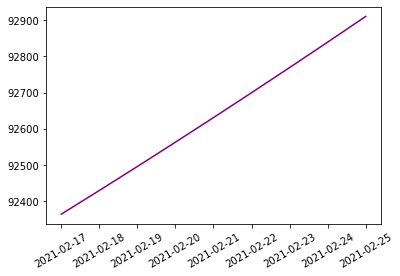

In [16]:
# 2021/02/16 데이터셋으로부터 발표날까지 9일 예측
forecast_data = model_fit.forecast(steps=9) 

pred_y = forecast_data[0].tolist() #예측 데이터입니다.

#plt.ylim([78000,88000])
plt.xticks([0,1,2,3,4,5,6,7,8], 
           ['2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20', 
            '2021-02-21', '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25'])
plt.xticks(rotation=30)
plt.plot(pred_y, color="purple") # 모델이 예상한 구독자 수 그래프입니다.

In [17]:
forecast_data[0].astype(int)

array([92364, 92429, 92496, 92563, 92631, 92699, 92769, 92839, 92910])